# **Mini Project Assignment -II**

Total Marks: 30

URL for Ecommerce Site:
https://www.flipkart.com/

### 1. Import Libraries (2 Marks)

In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 2. Use the above URL to scrape product links from product listing pages (3 Marks)

In [2]:
# Making a GET request
url= 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
webpage = requests.get(url)
print(webpage)

<Response [200]>


In [3]:
soup = BeautifulSoup(webpage.content, 'html.parser')

In [4]:
# To scrape product links from product listing pages
links=soup.find_all("a", attrs={'class':'_1fQZEK'})

In [5]:
links[0].get('href')

'/hp-celeron-dual-core-n4500-4-gb-128-gb-emmc-storage-chrome-os-15a-na0012tu-chromebook/p/itm7d20974c3dfce?pid=COMGNRNVW3HHPXFD&lid=LSTCOMGNRNVW3HHPXFDJRV8HQ&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_ITMi-OQKDMC1N79aCeZExAvzCltkM5ZrybdOt8Hqg7mvTxrrQGsPl4BBJNag-8ZQAxGv_qtU-5AsJyXnvtsgNQ%3D%3D&ppt=None&ppn=None&ssid=5r7voycxcw0000001700976599805&qH=c06ea84a1e3dc3c6'

In [6]:
#To scrape product links from product listing pages
product_link=[]
no=1
for i in links:
    print('Link',no)
    product_link.append('https://www.flipkart.com' + i.get('href'))
    print('https://www.flipkart.com' + i.get('href'))
    no=no+1    

Link 1
https://www.flipkart.com/hp-celeron-dual-core-n4500-4-gb-128-gb-emmc-storage-chrome-os-15a-na0012tu-chromebook/p/itm7d20974c3dfce?pid=COMGNRNVW3HHPXFD&lid=LSTCOMGNRNVW3HHPXFDJRV8HQ&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_ITMi-OQKDMC1N79aCeZExAvzCltkM5ZrybdOt8Hqg7mvTxrrQGsPl4BBJNag-8ZQAxGv_qtU-5AsJyXnvtsgNQ%3D%3D&ppt=None&ppn=None&ssid=5r7voycxcw0000001700976599805&qH=c06ea84a1e3dc3c6
Link 2
https://www.flipkart.com/asus-vivobook-15-core-i5-11th-gen-1135g7-8-gb-512-gb-ssd-windows-11-home-x515ea-ej522ws-thin-light-laptop/p/itmbfbbf7747aa01?pid=COMGFHNGGWNDVGSY&lid=LSTCOMGFHNGGWNDVGSY5C6JML&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=en_ITMi-OQKDMC1N79aCeZExAvzCltkM5ZrybdOt8Hqg7nqvWkJxCPJG8RG2onaDe6aMKBnjElGOh5j_xhzHRB5Sw%3D%3D&ppt=None&ppn=None&ssid=5r7voycxcw0000001700976599805&qH=c06ea84a1e3dc3c6
Link 3
https://www.flipkart.com/acer-one-core-i3-11th-

###  INFERENCE:   <font color='brown'> A single listing page has 24 laptops listed. The above output is the product link for all the 24 laptops listed in first search page.</font>

### 3. Scraping of "laptop" data from individual product pages (5 Marks)

In [8]:
for i in product_link:
    hp_webpage = requests.get(i)
    n_soup = BeautifulSoup(hp_webpage.content, 'html.parser')
    try:
        product_name=n_soup.find("span", attrs={'class':'B_NuCI'}).text
        print('Product-',product_name)
        product_price=n_soup.find("div", attrs={'class':'_30jeq3 _16Jk6d'}).text
        print('Price-',product_price)
        product_model=n_soup.find_all("li", attrs={'class':"_21lJbe"})[1].text
        print('Model-',product_model)
        product_type=n_soup.find_all("li", attrs={'class':"_21lJbe"})[6].text
        print('Type-',product_type)
        product_rating=n_soup.find("div", attrs={'class':'_3LWZlK'}).text
        print('Rating-',product_rating)
        product_review=n_soup.find("div", attrs={'class':'t-ZTKy'}).text
        print('Review-',product_review)
        print('=======================================================================================')
    except AttributeError as e:
        continue    

Product- HP Celeron Dual Core N4500 - (4 GB/128 GB EMMC Storage/Chrome OS) 15a- na0012TU Chromebook  (15.6 Inch, Forest Teal, 1.07 Kg)
Price- ₹27,490
Model- 15a- na0012TU
Type- Processing & Multitasking
Rating- 3.9
Review- Nice product suitable for any type of working and not too short works fastREAD MORE
Product- HP 255 G9 840T7PA Athlon Dual Core 3050U - (4 GB/256 GB SSD/DOS) 255 G8 Thin and Light Laptop  (15.6 Inch, Jet Black, 2.5 Kg)
Price- ₹19,860
Model- 255 G8
Type- Thin and Light Laptop
Rating- 3.9
Review- Overall average product for normally daily working.READ MORE
Product- DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/512 GB SSD/Windows 11 Home) INSPIRON 3511 Notebook  (15.6 Inch, Platinum Silver, 1.8 Kg, With MS Office)
Price- ₹38,490
Model- INSPIRON 3511
Type- Notebook
Rating- 3.7
Product- HP intel Celeron Dual Core N4500 - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook  (14 Inch, Mineral Silver, 1.46 kg)
Price- ₹25,990
Model- 14a- na1004TU
Type- Chromebook
Rat

###  INFERENCE:   <font color='brown'> Product information like  Product title, Price, Model, Type, Star rating and comments  are scraped from individual product pages for all the 24 products listed in the first product web page.</font>

In [9]:
for  i in range(1,45):
    url="https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
    print(url)

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com/search?

###  INFERENCE:   <font color='brown'> Lets get the links of all other product listing pages to scrape product details from each page.</font>

### 4. Construct csv file which includes following information and name it as product.CSV (5 Marks)
### a. Product title, b. Price,  c. Model,  d. Star rating including comments

In [252]:
Product_title=[]
Price=[]
Model=[]
Type=[]
Star_rating=[]
Comments=[]

for page in range(1,40):
    url="https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(page)
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.content, 'html.parser')
    links=soup.find_all("a", attrs={'class':'_1fQZEK'})
    product_link=[]
    num=0
    for i in links:
        product_link.append('https://www.flipkart.com' + i.get('href'))
    for product in product_link:
        webpage = requests.get(product)
        n_soup = BeautifulSoup(webpage.content, 'html.parser')
        try:
            product_name = n_soup.find("span", attrs={'class': 'B_NuCI'}).text
            product_price=n_soup.find("div", attrs={'class':'_30jeq3 _16Jk6d'}).text
            product_model=n_soup.find_all("li", attrs={'class':"_21lJbe"})[1].text
            product_type=n_soup.find_all("li", attrs={'class':"_21lJbe"})[6].text
            product_rating=n_soup.find("div", attrs={'class':'_3LWZlK'}).text
            product_review=n_soup.find("div", attrs={'class':'t-ZTKy'}).text
            Product_title.append(product_name)
            Price.append(product_price)
            Model.append(product_model)
            Type.append(product_type)
            Star_rating.append(product_rating)
            Comments.append(product_review)
            num=num+1
        except AttributeError as e:
            continue       

###  INFERENCE:   <font color='brown'> Product information like  Product title, Price, Model, Type, Star rating and comments  are scraped from individual product pages for all the products and details are appended to 6 lists.</font>

In [255]:
df= pd.DataFrame({'Product_title':Product_title,'Price':Price,'Model':Model,'Type':Type,'Star_rating':Star_rating,'Comments':Comments})
df

,Product_title,Price,Model,Type,Star_rating,Comments
0,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,"₹24,990",XL28,Grey,4.2,They offer free 6 months Microsoft 365 in the ...
1,HP Celeron Dual Core N4500 - (4 GB/128 GB EMMC...,"₹27,490",15a- na0012TU,Chromebook,3.9,Nice product suitable for any type of working ...
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,"₹38,990",X515EA-EJ522WS,Transparent Silver,4.3,BEST LEPTOP BEST PRICE BEST PERFORMANCEREAD MORE
3,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,"₹29,990",15s-ey1509AU,Natural Silver,4.1,Price wise decent deal with nice battery backu...
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",AO 14 Z 8-415,Silver,4.2,pros: - build quality is good considering pri...
...,...,...,...,...,...,...
680,ASUS Vivobook Go 15 (2023) Ryzen 5 Quad Core 7...,"₹39,990",E1504FA-NJ522WS,Mixed Black,4.2,Product is 👍 I will review after using 1 month...
681,Acer Aspire 7 Core i5 12th Gen 12450H - (16 GB...,"₹54,990",A715-76G,Charcoal Black,4.2,Cheapest RTX laptop with 16gigs of RAM right n...
682,Infinix Y1 Plus Neo Intel Celeron Quad Core 11...,"₹23,990",XL30,Blue,4,Good product... great priceee.... Laptop look ...
683,Infinix X3 Slim Intel Core i7 12th Gen 1255U -...,"₹46,990",XL422,Grey,4.1,Decent product at this price range.READ MORE


In [260]:
csv_file_path = r'C:\Users\Priyadarsshini S\SRM\NLP\MP2\Product.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

###  INFERENCE:   <font color='brown'> Now these lists are converted to a dataframe and are exported as a csv file .</font>

# Use  product.CSV as dataset and build the sentiment analysis model which will predict the positive/negative review based on the star rating.






# Data processing [5 marks]

### Load the csv file

In [233]:
df1=pd.read_csv("Product.csv")
df1.head()

,Product_title,Price,Model,Type,Star_rating,Comments
0,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,pros:- build quality is good considering price...
1,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Acer one core laptop purchased 26 Aug 2023 but...
2,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,WRITING REVIEW AFTER 2 DAYS USE.FLIPKART DELIV...
3,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Nice productValue for money but could be bette...
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Display issueREAD MORE


Prepare the data

In [234]:
df1.shape

(3281, 6)

In [235]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_title  3259 non-null   object 
 1   Price          3249 non-null   object 
 2   Model          3169 non-null   object 
 3   Type           3259 non-null   object 
 4   Star_rating    3207 non-null   float64
 5   Comments       3183 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.9+ KB


In [236]:
df1.isnull().sum().sum()

360

In [237]:
rows_with_null = df1[df1.isnull().any(axis=1)]
rows_with_null

,Product_title,Price,Model,Type,Star_rating,Comments
487,HP Core i5 12th Gen 1235U - (8 GB/512 GB SSD/W...,"₹54,990",15s-fy5007TU,Thin and Light Laptop,4.3,NaN
528,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN
753,MSI GF63 Core i5 11th Gen 11260H - (8 GB/512 G...,"₹47,990",GF63 Thin 11UCX-1497IN,Gaming Laptop,4.9,NaN
835,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3266,NaN,NaN,NaN,NaN,NaN,NaN
3267,Lenovo S14 Core i5 12th Gen 1235U - (8 GB/512 ...,"₹48,990",S14,Business Laptop,5.0,NaN
3268,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,"₹54,990",ZEB-NBC 5S,Thin and Light Laptop,NaN,NaN
3279,DELL Inspiron 5430 Core i7 13th Gen 13th Gener...,"₹96,990",INSPIRON 5430,Thin and Light Laptop,4.2,NaN


In [238]:
from sklearn.impute import KNNImputer

def KNN_imp(col):
    X = df1[[col]]                         # Dataframe containing column with missing values.
    imputer = KNNImputer(n_neighbors=3)   # KNN imputer object with k=3.
    X_imputed = imputer.fit_transform(X)  # Imputing missing values.
    df1[col] = X_imputed                   # Replacing missing values with the imputed values.
            
def mode_imp(col):
    for i in range(len(df1)):
            mode_val=df1[col].mode()
            df1[col].fillna(value=mode_val[0], inplace=True)     
            

In [239]:
num_col=['Star_rating']
catg_col= ['Product_title','Price','Model','Type','Comments']     
         
for i in num_col:
    KNN_imp(i)
    
for i in catg_col:
    mode_imp(i) 

In [240]:
df1.isnull().sum().sum()

0

###  INFERENCE:   <font color='brown'> Product.csv is loaded and missing values are imputed using KNN imputation.</font>

In [241]:
print('Greater than 4.2 rating=',(df1['Star_rating'] > 4.2).value_counts().loc[True])
print('Less than or equal to 4.2 rating=',(df1['Star_rating'] <= 4.2).value_counts().loc[True])

Greater than 4.2 rating= 1538
Less than or equal to 4.2 rating= 1743


In [242]:
def categorize_review(rating):
    if rating > 4.2 :
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to create a new column 'Sentiment' column
df1['Sentiment'] = df1['Star_rating'].apply(categorize_review)

<Axes: xlabel='Sentiment', ylabel='count'>

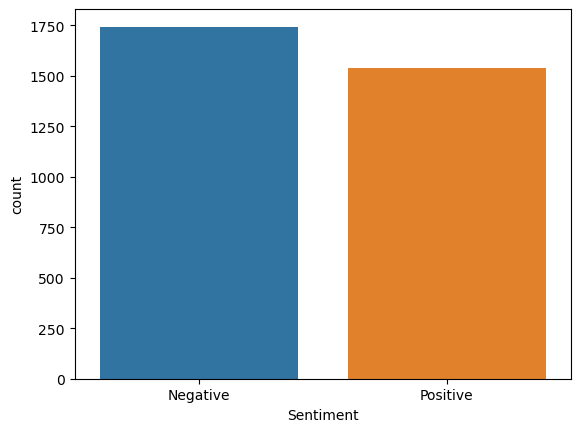

In [243]:
import seaborn as sns
sns.countplot(x='Sentiment',data=df1)

###  INFERENCE:   <font color='brown'> Lets add a new column called 'Sentiment' based on the rating values. Lets assume that ratings greater than 4.2 are 'Positive' and less than 4.2 rating as 'Negative'. </font>

In [244]:
df1.head()

,Product_title,Price,Model,Type,Star_rating,Comments,Sentiment
0,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,pros:- build quality is good considering price...,Negative
1,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Acer one core laptop purchased 26 Aug 2023 but...,Negative
2,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,WRITING REVIEW AFTER 2 DAYS USE.FLIPKART DELIV...,Negative
3,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Nice productValue for money but could be bette...,Negative
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Display issueREAD MORE,Negative


In [245]:
df1['Sentiment']=df1['Sentiment'].replace({'Negative':0,'Positive':1})
df1.head(5)

,Product_title,Price,Model,Type,Star_rating,Comments,Sentiment
0,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,pros:- build quality is good considering price...,0
1,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Acer one core laptop purchased 26 Aug 2023 but...,0
2,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,WRITING REVIEW AFTER 2 DAYS USE.FLIPKART DELIV...,0
3,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Nice productValue for money but could be bette...,0
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹26,990",Z8-415,Thin and Light Laptop,4.2,Display issueREAD MORE,0


###  INFERENCE:   <font color='brown'> Positive and Negative sentiments are replaced by values 1 and 0.</font>

### Perform an Text preprocessing tasks whichever is appropriate

In [246]:
data=df1[['Comments','Sentiment']]
data.head()

,Comments,Sentiment
0,pros:- build quality is good considering price...,0
1,Acer one core laptop purchased 26 Aug 2023 but...,0
2,WRITING REVIEW AFTER 2 DAYS USE.FLIPKART DELIV...,0
3,Nice productValue for money but could be bette...,0
4,Display issueREAD MORE,0


In [247]:
data.shape

(3281, 2)

In [248]:
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [249]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Priyadarsshini
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [250]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

def preprocess_text(sen):
    sentence = sen.lower()
    sentence = remove_tags(sentence)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  #Remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

###  INFERENCE:   <font color='brown'> All special characters, numbers and html tags are removed from the dataset.Text is converted to lowercase. Single character like apostrophe and multiple spaces are removed. Stop words like 'is','was' are removed. </font>

### Separate the dependent and the independent variables.

In [251]:
#Before Text preprocessing
data['Comments'][2]

'WRITING REVIEW AFTER 2 DAYS USE.FLIPKART DELIVERY IS EXCELLENT. I GOT DELIVERY IN ONE DAY.PROS:Boots in less than 12 secondsIPS DISPLAYLIGHT WEIGHT= 1.5KGPERFORMANCE AT PAR WITH OTHER I3 11TH GEN LAPTOPSSequential read write speed is 3100/2900 MBPSGEEK BENCHMARK 6 SCORESINGLE CORE 1877MULTI CORE 3350RAM USED SAMSUNG DDR4 3200MHZ, SINGLE CHANNEL.CONS:SSD NOT SHOWING IN SOFTWAREWIFI RECEPTION IS LOW. GIVES HALF THE SPEED COMPARED TO MY REALME 5 PRO MOBILE AT 20 FEET DI...READ MORE'

In [252]:
corpus = []
Comments = list(data['Comments'])
for line in Comments:
    corpus.append(preprocess_text(line))

In [253]:
#After Text preprocessing
corpus[2]

'writing review days use flipkart delivery excellent got delivery one day pros boots less secondsips displaylight weight kgperformance par th gen laptopssequential read write speed mbpsgeek benchmark scoresingle core multi core ram used samsung ddr mhz single channel cons ssd showing softwarewifi reception low gives half speed compared realme pro mobile feet di read '

###  INFERENCE:   <font color='brown'> This shows the comparison between 'Before' and 'After' text pre-processing.</font>

In [254]:
Y = data['Sentiment'].values
Y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Print the first ten records of data.

In [255]:
corpus[:10]

['pros build quality good considering price display also good fhd ips panel overall good package performance good gta low gives avg fps low gives fps type port fully functional connect external display power delivery battery decent easily give hrs normal usecons display backlit bleed issue visible full black output wifi pathetic speed less get mbps mobile read ',
 'acer one core laptop purchased aug display blink keys work flipkart team ignore problems replacement refund shamless flipkart pls buy products flipkartread ',
 'writing review days use flipkart delivery excellent got delivery one day pros boots less secondsips displaylight weight kgperformance par th gen laptopssequential read write speed mbpsgeek benchmark scoresingle core multi core ram used samsung ddr mhz single channel cons ssd showing softwarewifi reception low gives half speed compared realme pro mobile feet di read ',
 'nice productvalue money could betterread ',
 'display issueread ',
 'niceread ',
 'product good de

## Feature Extraction - Do count vectorizer and pad sequence use maximum features as 1000 [5 marks]

In [256]:
max_features = 1000
tokenizer = Tokenizer(nb_words=max_features, split=' ')
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(X)

C:\Users\Priyadarsshini S\anaconda3\Lib\site-packages\keras\src\preprocessing\text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [257]:
X[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       260,  66,  46,  26,  31,  95,  28,  40,  95,  17,  58,  98, 493,
       150,  70, 788,  84,  94,   1, 595,  82, 246, 596, 246,  48, 129,
       310, 289, 877, 667, 721, 134,  83, 597, 991,  47, 171, 363,  82,
       290, 467, 434, 409,   1])

### Split the training and testing data

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 40)
print('Shape of training samples:',X_train.shape,Y_train.shape)
print('Shape of testing samples:',X_test.shape,Y_test.shape)

Shape of training samples: (2624, 57) (2624,)
Shape of testing samples: (657, 57) (657,)


# Design a LSTM Model [5 marks]

In [259]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

In [260]:
model = Sequential()
model.add(Embedding(max_features, 128 ))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

### print the model summary

In [261]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         128000    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 259713 (1014.50 KB)
Trainable params: 259713 (1014.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Train and validate the model

In [262]:
model.fit(X_train, Y_train, epochs = 10 , batch_size=32, verbose = 1)

Epoch 1/10
82/82 [==============================] - 15s 146ms/step - loss: 0.6804 - accuracy: 0.5743
Epoch 2/10
82/82 [==============================] - 12s 150ms/step - loss: 0.5864 - accuracy: 0.6917
Epoch 3/10
82/82 [==============================] - 13s 157ms/step - loss: 0.4899 - accuracy: 0.7466
Epoch 4/10
82/82 [==============================] - 15s 180ms/step - loss: 0.4200 - accuracy: 0.7919
Epoch 5/10
82/82 [==============================] - 14s 168ms/step - loss: 0.3675 - accuracy: 0.8182
Epoch 6/10
82/82 [==============================] - 13s 162ms/step - loss: 0.3279 - accuracy: 0.8346
Epoch 7/10
82/82 [==============================] - 13s 161ms/step - loss: 0.3065 - accuracy: 0.8434
Epoch 8/10
82/82 [==============================] - 14s 165ms/step - loss: 0.2924 - accuracy: 0.8502
Epoch 9/10
82/82 [==============================] - 14s 173ms/step - loss: 0.2816 - accuracy: 0.8537
Epoch 10/10
82/82 [==============================] - 15s 184ms/step - loss: 0.2512 - accura

In [263]:
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = 32)
print("Score: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

21/21 [==============================] - 2s 45ms/step - loss: 1.0293 - accuracy: 0.7123
Score: 1.03
Accuracy: 0.71


### Test the model with your own example.

In [264]:
text = 'Delivery was very late. Slow boot'
tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']

tester['text'] = tester['text'].apply(lambda x: x.lower())
tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_features = 1000
test = tokenizer.texts_to_sequences(tester['text'].values)
test = pad_sequences(test)

if X.shape[1]>test.shape[1]:
    test = np.pad(test[0], (X.shape[1]-test.shape[1],0), 'constant')

test = np.array([test])

prediction = model.predict(test)
if prediction[0] < 0.5:
    print('Prediction value:',prediction[0], 'Negative')
else:
    print('Prediction value:',prediction[0], 'Positive')

1/1 [==============================] - 1s 834ms/step
Prediction value: [0.00402975] Negative


In [265]:
text = 'Laptop is great. Display and performance is good while gaming and doing other tasks.'
tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']

tester['text'] = tester['text'].apply(lambda x: x.lower())
tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_features = 1000
test = tokenizer.texts_to_sequences(tester['text'].values)
test = pad_sequences(test)

if X.shape[1]>test.shape[1]:
    test = np.pad(test[0], (X.shape[1]-test.shape[1],0), 'constant')

test = np.array([test])

prediction = model.predict(test)
if prediction[0] < 0.5:
    print('Prediction value:',prediction[0], 'Negative')
else:
    print('Prediction value:',prediction[0], 'Positive')

1/1 [==============================] - 0s 67ms/step
Prediction value: [0.98757195] Positive


###  INFERENCE:   <font color='brown'> Test examples work fine for both Positve and Negative comments.</font>